### Load Processed Data

In [1]:
import numpy as np
import pickle

# Load the arrays
train_x = np.load('../processed_data/train_x.npy')
test_x = np.load('../processed_data/test_x.npy')
train_y = np.load('../processed_data/train_y.npy')
test_y = np.load('../processed_data/test_y.npy')

# Load the vocab dictionaries
with open('../processed_data/words_vocab.pkl', 'rb') as f:
    words_vocab = pickle.load(f)

with open('../processed_data/pos_vocab.pkl', 'rb') as f:
    pos_vocab = pickle.load(f)

with open('../processed_data/ners_vocab.pkl', 'rb') as f:
    ners_vocab = pickle.load(f)

# Load the words, poss, and ners lists
with open('../processed_data/words.pkl', 'rb') as f:
    words = pickle.load(f)

with open('../processed_data/poss.pkl', 'rb') as f:
    poss = pickle.load(f)

with open('../processed_data/ners.pkl', 'rb') as f:
    ners = pickle.load(f)

# Define the number of unique words, POS tags, and NER tags
nbr_words = len(words_vocab)
nbr_pos = len(pos_vocab)
nbr_ners = len(ners_vocab)

# Define maximum sentence length
max_len = 25


### Building the model

In [2]:
# import classes
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [3]:
from keras import backend as K

# Clear previous session
K.clear_session()

In [4]:
print(f'vocab size = {len(words_vocab)}')
print(f'embedding size = {max_len}')
print(f'number of possible labels = {len(pos_vocab)}')

vocab size = 16248
embedding size = 25
number of possible labels = 15


In [5]:
# defining the model 
def model():
    # instantiate the model
    model = Sequential()
    # define embedding layer
    model.add(Embedding(nbr_words,
                       max_len,
                       input_shape = (max_len,)))
    # define LSTM layer 
    model.add(LSTM(100, 
                   activation = 'tanh', 
                   return_sequences=True,
                  recurrent_dropout=0.1))
    # compiling the model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [6]:
# create the model by calling the function
POS_model = model()
print(POS_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 25)            406200    
                                                                 
 lstm (LSTM)                 (None, 25, 100)           50400     
                                                                 
Total params: 456,600
Trainable params: 456,600
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# if the val_accuracy does not improve after 5 epochs, then stop training
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)
history = POS_model.fit(train_x, train_y, 
                        validation_data = (test_x, test_y),
                        batch_size=32,
                        epochs=10,
                        callbacks = early_stopping)

Epoch 1/10
102/102 [==============================] - 7s 34ms/step - loss: 3.2835 - accuracy: 0.5222 - val_loss: 1.6569 - val_accuracy: 0.5976
Epoch 2/10
102/102 [==============================] - 3s 33ms/step - loss: 1.3869 - accuracy: 0.6643 - val_loss: 1.3202 - val_accuracy: 0.7074
Epoch 3/10
102/102 [==============================] - 3s 34ms/step - loss: 0.8711 - accuracy: 0.7678 - val_loss: 1.0605 - val_accuracy: 0.7503
Epoch 4/10
102/102 [==============================] - 3s 34ms/step - loss: 0.6630 - accuracy: 0.8197 - val_loss: 0.9897 - val_accuracy: 0.7840
Epoch 5/10
102/102 [==============================] - 3s 31ms/step - loss: 0.5956 - accuracy: 0.8626 - val_loss: 1.1530 - val_accuracy: 0.7449


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

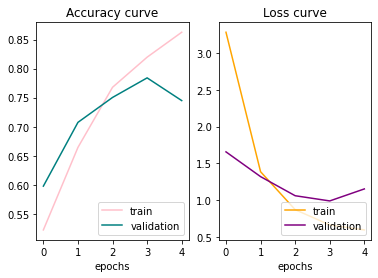

In [9]:
import matplotlib.pyplot as plt
# plotting the accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='pink')
plt.plot(history.history['val_accuracy'], color='teal')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epochs')
plt.title('Accuracy curve')

# plotting the loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='purple')
plt.legend(['train', 'validation'], loc='lower right')
plt.xlabel('epochs')
plt.title('Loss curve')

plt.show()

### Evaluate the model

In [10]:
test_loss, test_accuracy  = POS_model.evaluate(test_x, test_y, batch_size=128)
print(f'test accuracy: {test_accuracy}\ntest loss: {test_loss}')

7/7 [==============================] - 0s 16ms/step - loss: 1.1530 - accuracy: 0.7449
test accuracy: 0.7449260950088501
test loss: 1.15296471118927


In [11]:
i =  np.random.randint(0, test_x.shape[0])
print("This is sentence:",i)
p = POS_model.predict(np.array([test_x[i]]))
p = np.argmax(p, axis=-1)

print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(test_x[i], test_y[i], p[0]):
    print("{:15}{}\t{}".format(words[w-1], poss[true-1], poss[pred-1]))

This is sentence: 286


1/1 [==============================] - 0s 357ms/step
Word           True 	 Pred

------------------------------
মাওলানা        NNP	NNP
ভাসানী         NNP	NNP
ছিলেন          VF	VF
মজলুম          ADJ	INTJ
জননেতা।        NNC	NNP
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
ভুটান।         INTJ	INTJ
